In [1]:
import cv2
import glob
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

Import some library to draw plots, etc.

In [2]:
def results(confusion_mat):
    TP = np.diag(confusion_mat)
    FP = confusion_mat.sum(axis=0) - TP
    FN = confusion_mat.sum(axis=1) - TP
    TN = confusion_mat.sum() - (FP + FN + TP)
    TPR = TP/(TP+FN)
    PPV = TP/(TP+FP)
    ACC = (TP+TN)/(TP+FP+FN+TN)

    print('\nRecall: ', TPR[0])
    print("\nPrecision: ", PPV[0])
    print('\nAccuracy: ',ACC[0],'\n')

To calculate Terminology and derivations
from a confusion matrix

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mount Google drive for data set

In [4]:
train_directory = '/content/drive/MyDrive/ML/image'


files_jungle = []
files_sea = []
color = []
label = []

[files_jungle.extend(glob.glob(train_directory + '/j**.jpg'))]
[files_sea.extend(glob.glob(train_directory + '/s**.jpg'))]

jungles = [cv2.imread(idir) for idir in files_jungle]
seas = [cv2.imread(idir) for idir in files_sea]

for i in seas:
  avg_BGR = cv2.mean(i)
  label.append('s')
  color.append(avg_BGR)

for i in jungles:
  avg_BGR = cv2.mean(i)
  label.append('j')
  color.append(avg_BGR)

To read images and find their color code and average of it.

In [5]:
predicted_label = []
for i in color :
  if i[2] > i[0] :
    j = 'j'

  elif i[2] <= i[0]:
    j = 's'

  predicted_label.append(j)

predict label for data

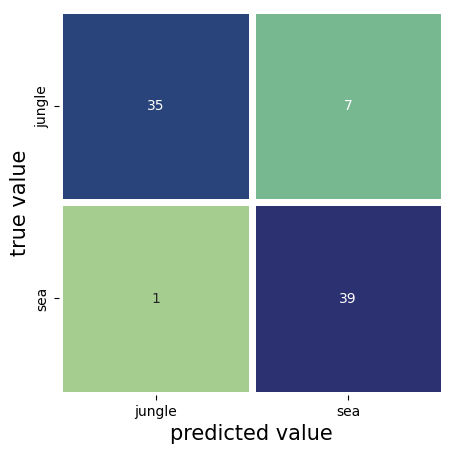


Recall:  0.8333333333333334

Precision:  0.9722222222222222

Accuracy:  0.9024390243902439 



In [6]:
mat = confusion_matrix(np.array(label),predicted_label)
plt.figure(figsize = (5,5))
a = sns.heatmap(mat, square=True, annot=True, cbar=False, cmap = 'crest' , linewidth= 5)
plt.xlabel('predicted value', fontsize = 15)
plt.ylabel('true value', fontsize = 15)
a.xaxis.set_ticklabels(['jungle','sea'], fontsize = 10)
a.yaxis.set_ticklabels(['jungle','sea'], fontsize = 10)
plt.show()
results(mat)

To calculate confusion matrix and find the Recall, Precision, Accuracy.

In [7]:
Images=[]
Images.extend(files_sea)
Images.extend(files_jungle)


for (i, j, k) in zip(label, predicted_label, Images):
  if not i == j:
    print(k)


/content/drive/MyDrive/ML/image/s24.jpg
/content/drive/MyDrive/ML/image/j3.jpg
/content/drive/MyDrive/ML/image/j8.jpg
/content/drive/MyDrive/ML/image/j9.jpg
/content/drive/MyDrive/ML/image/j15.jpg
/content/drive/MyDrive/ML/image/j16.jpg
/content/drive/MyDrive/ML/image/j44.jpg
/content/drive/MyDrive/ML/image/j45.jpg


 find misclassified data